In [1]:
import tensorflow as tf
import numpy as np
import math
import pandas as pd
from tensorflow.keras import layers
from tinymlgen import port
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt
import seaborn as sns
from keras import regularizers
from tensorflow.keras import initializers
from sklearn.preprocessing import StandardScaler
import time

In [2]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
import time

Tensorflow/Keras: 2.10.0
pandas: 1.4.4
numpy: 1.21.5
sklearn: 1.2.2
plotly: 5.9.0


In [3]:
# GRU

In [4]:
df = pd.read_excel('SolarPowerLoad.xlsx')
df

,Datetime,Hour,Load,Isi Sejenis,Hari,Bulan,Libur,Temperature,Temperature (t-1),Delta Suhu,...,Delta Load,Load (t-2),Delta Load (t-1),Load (t-3),Delta Load (t-2),Aoi,Poa_global,Poa_global (t-1),Poa_global (t-2),Poa_global (t-3)
0,2019-01-01,00:00:00+07:00,1.066207,2018-01-01 00:00:00,2,1,1,17.500000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,160.996018,0.000000,0.0,0.000000,0.000000
1,2019-01-01,01:00:00+07:00,0.993168,2018-01-01 01:00:00,2,1,1,17.300000,17.5,0.200000,...,0.073039,0.000000,0.000000,0.000000,0.000000,155.068173,0.000000,0.0,0.000000,0.000000
2,2019-01-01,02:00:00+07:00,1.133169,2018-01-01 02:00:00,2,1,1,17.200000,17.3,0.100000,...,0.140001,1.066207,0.073039,0.000000,0.000000,143.928387,0.000000,0.0,0.000000,0.000000
3,2019-01-01,03:00:00+07:00,0.984738,2018-01-01 03:00:00,2,1,1,17.400000,17.2,0.200000,...,0.148431,0.993168,0.140001,1.066207,0.073039,131.042354,0.000000,0.0,0.000000,0.000000
4,2019-01-01,04:00:00+07:00,1.058313,2018-01-01 04:00:00,2,1,1,18.781633,17.4,1.381633,...,0.073574,1.133169,0.148431,0.993168,0.140001,117.525260,40.698686,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8491,2019-12-20,19:00:00+07:00,3.003959,2019-12-20 19:00:02,5,12,0,22.500000,22.6,0.100000,...,5.383973,16.703030,8.315099,22.179632,5.476601,108.336373,0.000000,0.0,13.904461,55.616008
8492,2019-12-20,20:00:00+07:00,1.820420,2019-12-20 20:00:02,5,12,0,22.300000,22.5,0.200000,...,1.183540,8.387932,5.383973,16.703030,8.315099,121.990495,0.000000,0.0,0.000000,13.904461
8493,2019-12-20,21:00:00+07:00,1.764985,2019-12-20 21:00:02,5,12,0,21.000000,22.3,1.300000,...,0.055435,3.003959,1.183540,8.387932,5.383973,135.302158,0.000000,0.0,0.000000,0.000000
8494,2019-12-20,22:00:00+07:00,1.751196,2019-12-20 22:00:02,5,12,0,21.000000,21.0,0.000000,...,0.013789,1.820420,0.055435,3.003959,1.183540,147.715878,0.000000,0.0,0.000000,0.000000


In [5]:
df.corr()

,Load,Hari,Bulan,Libur,Temperature,Temperature (t-1),Delta Suhu,Jam,Tanggal,Load (t-1),...,Delta Load,Load (t-2),Delta Load (t-1),Load (t-3),Delta Load (t-2),Aoi,Poa_global,Poa_global (t-1),Poa_global (t-2),Poa_global (t-3)
Load,1.000000,-3.246593e-01,3.794688e-02,-3.872265e-01,0.604904,0.659996,0.417487,6.732868e-02,1.047236e-02,0.894649,...,0.585756,0.768463,0.544772,0.614999,0.469865,-0.668922,0.564396,0.641765,0.662030,0.618153
Hari,-0.324659,1.000000e+00,-5.432337e-04,7.698971e-01,0.002888,0.003397,0.001243,-2.815975e-17,7.605596e-03,-0.324573,...,-0.255707,-0.324479,-0.255488,-0.324214,-0.254985,-0.000152,0.003397,0.003397,0.003397,0.003397
Bulan,0.037947,-5.432337e-04,1.000000e+00,-4.041752e-02,0.005429,0.005765,0.024291,2.547849e-15,-4.880779e-02,0.037957,...,0.021495,0.037972,0.021511,0.037987,0.021520,0.002581,0.004877,0.004877,0.004877,0.004877
Libur,-0.387227,7.698971e-01,-4.041752e-02,1.000000e+00,0.004543,0.004295,0.007606,-1.430029e-16,2.259561e-03,-0.387001,...,-0.323815,-0.386798,-0.323436,-0.386283,-0.322568,-0.000756,0.007323,0.007323,0.007323,0.007323
Temperature,0.604904,2.887504e-03,5.428772e-03,4.542784e-03,1.000000,0.937260,0.456777,-8.232077e-02,-5.692771e-03,0.497194,...,0.326647,0.352578,0.296224,0.189482,0.243461,-0.842713,0.977375,0.939846,0.809587,0.616721
Temperature (t-1),0.659996,3.397402e-03,5.765237e-03,4.295373e-03,0.937260,1.000000,0.491983,3.824788e-02,-5.515064e-03,0.604849,...,0.339797,0.497180,0.326668,0.352619,0.296255,-0.878918,0.884344,0.977176,0.939661,0.809450
Delta Suhu,0.417487,1.243191e-03,2.429071e-02,7.606018e-03,0.456777,0.491983,1.000000,-3.425916e-02,5.704930e-04,0.353824,...,0.350771,0.265882,0.250935,0.171093,0.127149,-0.576510,0.405099,0.471822,0.473155,0.442491
Jam,0.067329,-2.815975e-17,2.547849e-15,-1.430029e-16,-0.082321,0.038248,-0.034259,1.000000e+00,5.406172e-17,0.163288,...,0.101271,0.258085,0.188153,0.351817,0.272728,-0.074509,-0.126127,-0.018574,0.088979,0.196532
Tanggal,0.010472,7.605596e-03,-4.880779e-02,2.259561e-03,-0.005693,-0.005515,0.000570,5.406172e-17,1.000000e+00,0.010548,...,0.010687,0.010587,0.010654,0.010659,0.010821,-0.002251,-0.006665,-0.006665,-0.006665,-0.006665
Load (t-1),0.894649,-3.245734e-01,3.795703e-02,-3.870011e-01,0.497194,0.604849,0.353824,1.632884e-01,1.054836e-02,1.000000,...,0.565082,0.894651,0.585760,0.768467,0.544775,-0.631918,0.440537,0.564400,0.641768,0.662033


<AxesSubplot:>

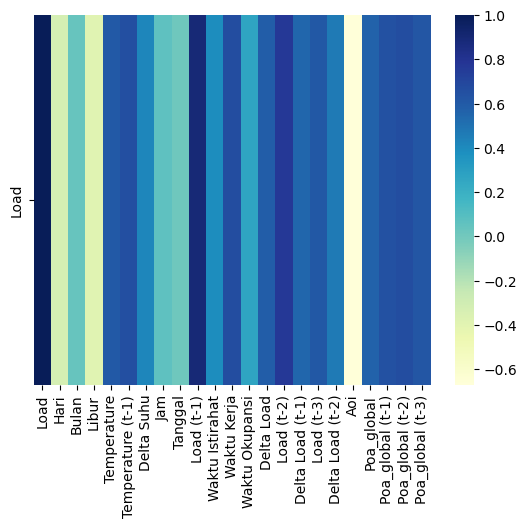

In [6]:
sns.heatmap(df.corr().loc[['Load'],:], cmap="YlGnBu")

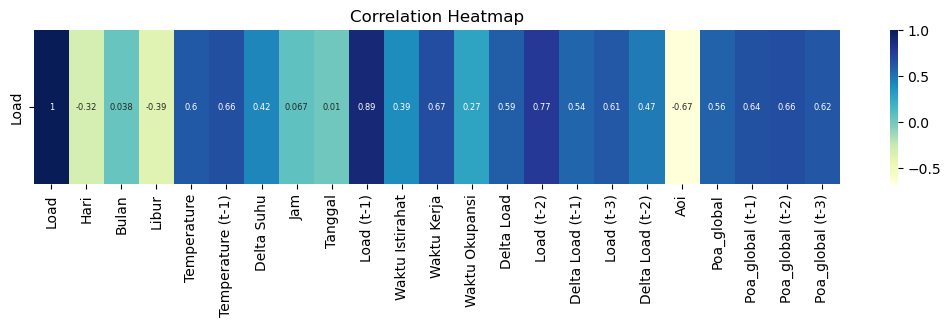

In [7]:
# Adjust the figure size
plt.figure(figsize=(13, 2))

# Generate the heatmap with correlation values and adjust the font size
ax = sns.heatmap(df.corr().loc[['Load'], :], cmap="YlGnBu", annot=True, annot_kws={"size": 6})

# Set the fontsize for the tick labels
ax.tick_params(labelsize=10)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

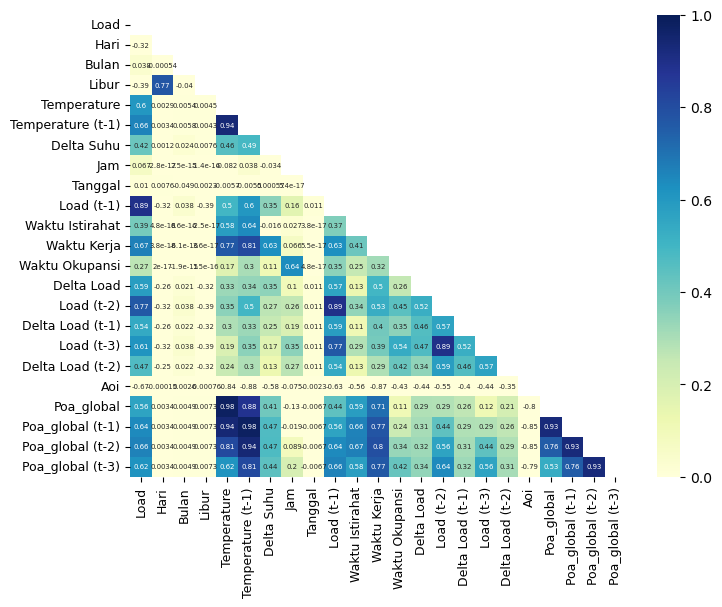

In [8]:
# Increase the figure size
plt.figure(figsize=(8, 6))

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a mask to visualize only half of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate the heatmap with the mask
ax = sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, cmap="YlGnBu", mask=mask, annot_kws={"fontsize": 5})

# Set the fontsize for the annotation numbers
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)

# Display the plot
plt.show()

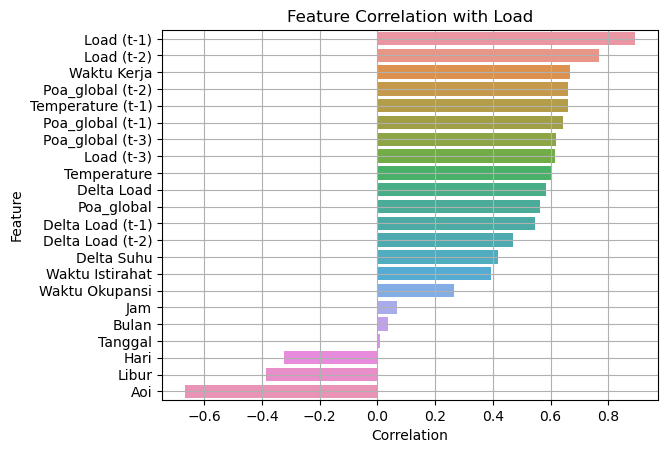

In [9]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Filter and sort the correlation values for the target variable "Load"
target_correlation = corr_matrix['Load'].drop('Load').sort_values(ascending=False)

# Create a bar plot of the correlation values
sns.barplot(x=target_correlation.values, y=target_correlation.index)

# Set labels and title
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Feature Correlation with Load')

# Show gridlines
plt.grid(True)

# Show the plot
plt.show()



In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Load the Excel data
excel_file = 'SolarPowerLoad-tanpatimestamp.xlsx'  #filter kolom
data = pd.read_excel(excel_file)

# Separate the timestamp columns from the features
#timestamp_columns = ['Hari', 'Bulan', 'Libur', 'Temperature','Temperature (t-1)','Delta Suhu','Jam','Tanggal','Load (t-1)','Waktu Istirahat','Waktu Kerja','Waktu Okupansi','Delta Load','Hari Kerja','Load (t-2)','Delta Load (t-1)','Delta Load (t-2)']
timestamp_columns = ['Bulan']
features = data.drop(columns=timestamp_columns)

# Convert the target variable to numeric using label encoding
target_column = 'Load'  # Replace with your target column name
le = LabelEncoder()
y = le.fit_transform(features[target_column])

# Separate the features (X)
X = features.drop(columns=[target_column])

# Apply the SelectKBest feature selection method
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected features:", selected_features)

Selected features: Index(['Load (t-1)', 'Delta Load', 'Load (t-2)', 'Load (t-3)',
       'Delta Load (t-2)', 'Aoi', 'Poa_global', 'Poa_global (t-1)',
       'Poa_global (t-2)', 'Poa_global (t-3)'],
      dtype='object')


In [89]:
#X=df[['Hari', 'Poa_global (t-1)', 'Poa_global', 'Load (t-3)', 'Delta Load (t-2)']]
X=df[['Hari', 'Poa_global (t-1)', 'Poa_global', 'Delta Load (t-2)', 'Load (t-3)', 'Delta Load (t-1)', 'Load (t-2)', 'Delta Load', 'Waktu Okupansi', 'Poa_global (t-2)']]
y=df['Load'].values
std=StandardScaler()
X_std=std.fit_transform(X)

In [90]:
train_size=int(0.7*len(X_std))
test_size=int(0.98*len(X_std))
X_train=X_std[:train_size]
X_val=X_std[train_size:test_size]
X_test=X_std[test_size:]

X_train=X_train.reshape(-1,1,10)
X_val=X_val.reshape(-1,1,10)
X_test=X_test.reshape(-1,1,10)

y_train=y[:train_size]
y_val=y[train_size:test_size]
y_test=y[test_size:]

y_train=y_train.reshape(-1,1,1)
y_val=y_val.reshape(-1,1,1)
y_test=y_test.reshape(-1,1,1)

In [91]:
print("Panjang data training:", len(X_train))
print("Panjang data validasi:", len(X_val))
print("Panjang data testing:", len(X_test))

Panjang data training: 5947
Panjang data validasi: 2379
Panjang data testing: 170


In [103]:
output_layers=1
model=tf.keras.Sequential([
    tf.keras.layers.GRU(64,input_shape=(X_train.shape[1],X_train.shape[2]),activation='sigmoid',return_sequences=True),
    tf.keras.layers.GRU(32,activation='softplus'),
    #tf.keras.layers.GRU(32,activation='sigmoid',recurrent_activation='relu'),
    tf.keras.layers.Dense(output_layers,activation='linear')
])
print(model.summary())
print('\n')

model.compile(loss='mse',optimizer=tf.optimizers.Adam(learning_rate=0.1),metrics=['mae','mse'])
#model.compile(loss='mse',optimizer='adam',metrics=['mae','mse'])

# Start the timer
start_time = time.time()

history=model.fit(X_train,y_train,
                  epochs=150,
                  batch_size=100,
                  verbose=1,
                  steps_per_epoch=len(X_train)//100,
                  validation_data=(X_val,y_val),
                  validation_steps=len(X_test)/100,
                  validation_batch_size=150
                 )

# Stop the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 1, 64)             14592     
                                                                 
 gru_13 (GRU)                (None, 32)                9408      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24,033
Trainable params: 24,033
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/150
59/59 [==============================] - 8s 31ms/step - loss: 63.8982 - mae: 4.3303 - mse: 63.8982 - val_loss: 37.3820 - val_mae: 3.3700 - val_mse: 37.3820
Epoch 2/150
59/59 [==============================] - 1s 10ms/step - loss: 29.2890 - mae: 2.9103 - mse: 29.2890 - val_loss: 27.2597 - val_ma

Epoch 45/150
59/59 [==============================] - 1s 10ms/step - loss: 19.7761 - mae: 2.1912 - mse: 19.7761 - val_loss: 21.5565 - val_mae: 2.4038 - val_mse: 21.5565
Epoch 46/150
59/59 [==============================] - 1s 10ms/step - loss: 17.4309 - mae: 1.9970 - mse: 17.4309 - val_loss: 14.1691 - val_mae: 1.9561 - val_mse: 14.1691
Epoch 47/150
59/59 [==============================] - 1s 10ms/step - loss: 18.2594 - mae: 2.0621 - mse: 18.2594 - val_loss: 13.3972 - val_mae: 1.9074 - val_mse: 13.3972
Epoch 48/150
59/59 [==============================] - 1s 10ms/step - loss: 16.6103 - mae: 2.0007 - mse: 16.6103 - val_loss: 12.2239 - val_mae: 1.8865 - val_mse: 12.2239
Epoch 49/150
59/59 [==============================] - 1s 10ms/step - loss: 17.5187 - mae: 1.9827 - mse: 17.5187 - val_loss: 18.0960 - val_mae: 2.3424 - val_mse: 18.0960
Epoch 50/150
59/59 [==============================] - 1s 10ms/step - loss: 17.1767 - mae: 2.0102 - mse: 17.1767 - val_loss: 13.1887 - val_mae: 1.9474 - val

59/59 [==============================] - 1s 10ms/step - loss: 13.8113 - mae: 1.8234 - mse: 13.8113 - val_loss: 13.3172 - val_mae: 1.8392 - val_mse: 13.3172
Epoch 94/150
59/59 [==============================] - 1s 10ms/step - loss: 15.8325 - mae: 1.9312 - mse: 15.8325 - val_loss: 14.4700 - val_mae: 1.9520 - val_mse: 14.4700
Epoch 95/150
59/59 [==============================] - 1s 10ms/step - loss: 14.3807 - mae: 1.9067 - mse: 14.3807 - val_loss: 18.7769 - val_mae: 2.2368 - val_mse: 18.7769
Epoch 96/150
59/59 [==============================] - 1s 10ms/step - loss: 14.7669 - mae: 1.8970 - mse: 14.7669 - val_loss: 14.4764 - val_mae: 1.9246 - val_mse: 14.4764
Epoch 97/150
59/59 [==============================] - 1s 10ms/step - loss: 14.4056 - mae: 1.8975 - mse: 14.4056 - val_loss: 13.8175 - val_mae: 1.9727 - val_mse: 13.8175
Epoch 98/150
59/59 [==============================] - 1s 10ms/step - loss: 15.6620 - mae: 1.9123 - mse: 15.6620 - val_loss: 10.4878 - val_mae: 1.7078 - val_mse: 10.4878

59/59 [==============================] - 1s 11ms/step - loss: 11.8956 - mae: 1.7358 - mse: 11.8956 - val_loss: 13.8232 - val_mae: 2.0973 - val_mse: 13.8232
Epoch 142/150
59/59 [==============================] - 1s 10ms/step - loss: 11.6067 - mae: 1.7170 - mse: 11.6067 - val_loss: 14.6237 - val_mae: 2.0055 - val_mse: 14.6237
Epoch 143/150
59/59 [==============================] - 1s 10ms/step - loss: 11.3229 - mae: 1.6575 - mse: 11.3229 - val_loss: 20.7074 - val_mae: 2.2535 - val_mse: 20.7074
Epoch 144/150
59/59 [==============================] - 1s 10ms/step - loss: 13.8659 - mae: 1.9220 - mse: 13.8659 - val_loss: 17.3881 - val_mae: 2.0554 - val_mse: 17.3881
Epoch 145/150
59/59 [==============================] - 1s 10ms/step - loss: 12.5059 - mae: 1.7682 - mse: 12.5059 - val_loss: 14.3895 - val_mae: 1.8742 - val_mse: 14.3895
Epoch 146/150
59/59 [==============================] - 1s 10ms/step - loss: 11.6276 - mae: 1.6910 - mse: 11.6276 - val_loss: 15.4713 - val_mae: 1.9626 - val_mse: 15

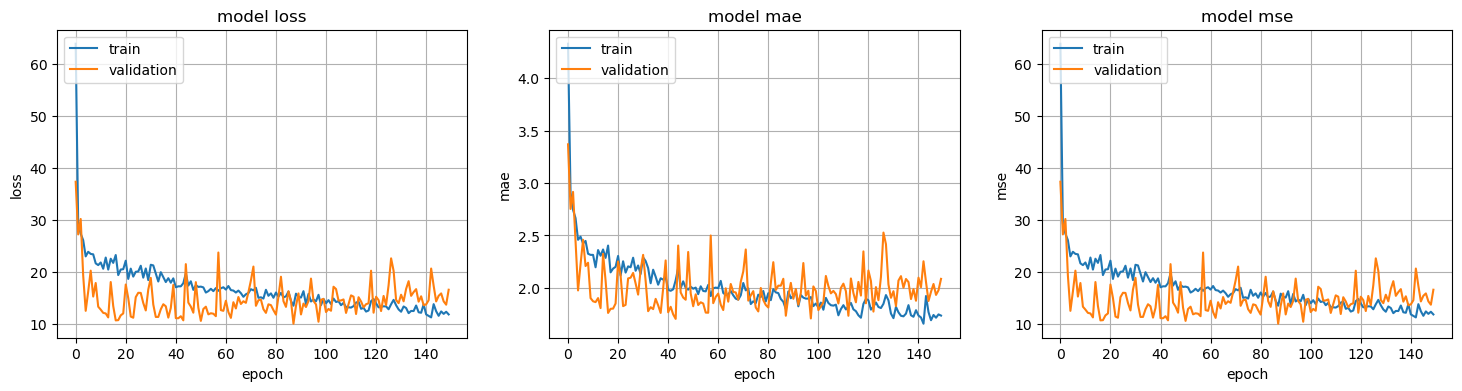

In [105]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,4))
metric=['loss','mae','mse']
for i in range(3):
    ax[i].plot(history.history['{}'.format(metric[i])])
    ax[i].plot(history.history['val_{}'.format(metric[i])])
    ax[i].set_title('model {}'.format(metric[i]))
    ax[i].set_ylabel('{}'.format(metric[i]))
    ax[i].set_xlabel('epoch')
    ax[i].legend(['train', 'validation'], loc='upper left')
    ax[i].grid()

In [106]:
y_pred=model.predict(X_test)

6/6 [==============================] - 1s 7ms/step


In [107]:
len(y_pred.reshape(-1))

170

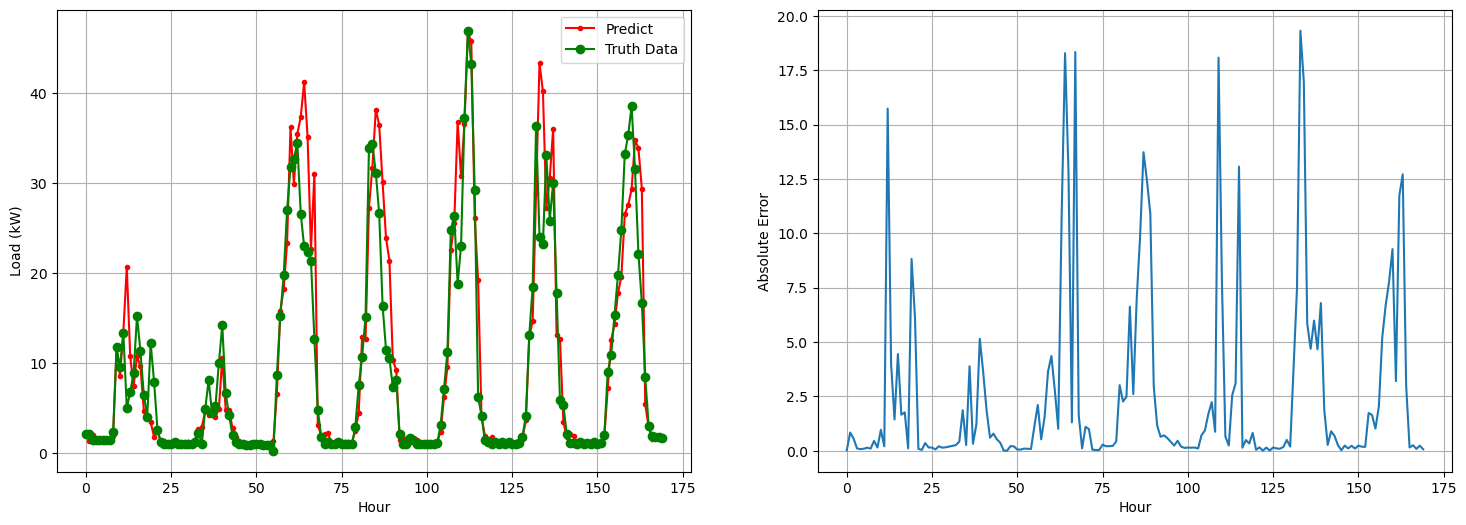

In [108]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
abs_error=np.abs(y_pred.reshape(-1)-y_test.reshape(-1))

ax[0].plot(range(len(y_test.reshape(-1))),y_pred.reshape(-1),label='Predict',marker='.',color='red')
ax[0].plot(range(len(y_test.reshape(-1))),y_test.reshape(-1),label='Truth Data',marker='o',color='green')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Load (kW)')
ax[0].legend()
ax[0].grid()

ax[1].plot(range(len(y_test.reshape(-1))),abs_error)
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Absolute Error')
ax[1].grid()

In [109]:
y_pred_all=model.predict(X_std.reshape(-1,1,10)).reshape(-1)

266/266 [==============================] - 1s 3ms/step


Text(0, 0.5, 'Absolute Error %')

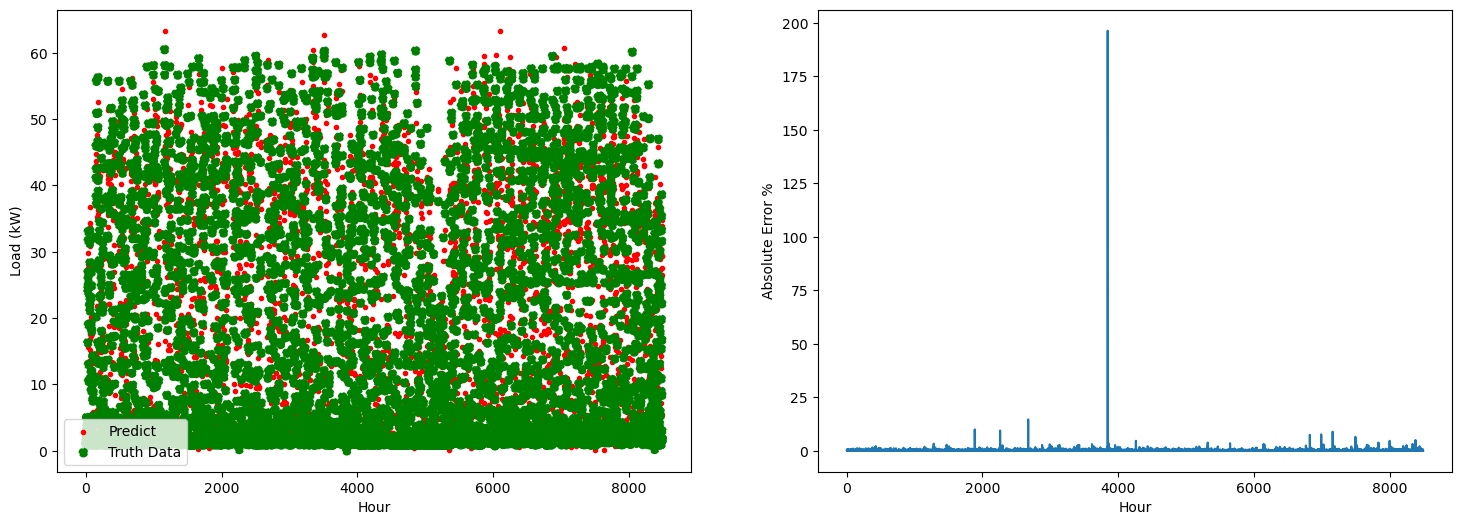

In [110]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
abs_error=np.abs(y_pred_all-y)/y

ax[0].scatter(range(len(X_std)),y_pred_all,label='Predict',marker='.',color='red')
ax[0].scatter(range(len(X_std)),y,label='Truth Data',ls='--',color='green')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Load (kW)')
ax[0].legend(loc='lower left')

ax[1].plot(range(len(X)),abs_error)
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Absolute Error %')

In [111]:
print('mse:',np.mean((y_pred_all-y)**2))
print('mae:',np.mean(abs_error))

mse: 16.70462519998072
mae: 0.263583578068457


In [112]:
import statistics
import numpy
from math import sqrt

def mape(y, y_pred_all): 
    y, y_pred_all = np.array(y), np.array(y_pred_all)
    return np.mean(np.abs((y - y_pred_all) / y)) * 100
print('MAPE :',mape(y, y_pred_all) )

RMSE=sqrt(mean_squared_error(y,y_pred_all))
print('RMSE :',RMSE)

Avg = statistics.mean(y)
print("Mean :", Avg)

corr_matrix = numpy.corrcoef(y,y_pred_all)
corr = corr_matrix[0,1]
R_sq = corr**2

print("R2 :", R_sq)

CVRMSE = ((RMSE/Avg)*100)
print("CV-RMSE :", CVRMSE)

MBE = np.mean(y-y_pred_all) #here we calculate MBE
print("MBE :", MBE)

NMBE = ((MBE/Avg)*100)
print("NMBE :", NMBE)

MAPE : 26.3583578068457
RMSE : 4.0871292125379055
Mean : 12.427811696026804
R2 : 0.9390408039147387
CV-RMSE : 32.88695799796008
MBE : 0.313625233794407
NMBE : 2.523575682231117


In [113]:
VP = sqrt(np.mean((y_pred_all)**2))
#print('VP :', VP)

VA = sqrt(np.mean((y)**2))
#print('VA :', VA)

IC = (RMSE/(VP+VA))
print('Inequality Coefficient :', IC)

Inequality Coefficient : 0.1010327232643488


In [114]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y, y_pred_all, squared=True)
print("RMSLE :", rmsle)

RMSLE : 0.05578948416074539


In [115]:
print("Execution time:", execution_time, "seconds")

Execution time: 106.73939657211304 seconds
